# REALTY RATE
## Real Estate Price Prediction Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Here, We will convert our csv dataset to python dataframe.
df = pd.read_csv('USA_Data.csv')

In [3]:
# Printing first five rows of the dataframe.
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [4]:
# Printing Number of Rows and Columns in our dataframe.
df.shape

(904966, 10)

In [5]:
# Printing Brief summary of our dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


In [6]:
# Finding Number of Unique Values in each column. 
df.nunique()

status               2
bed                 43
bath                39
acre_lot          3257
city              2487
state               18
zip_code          3140
house_size        6344
prev_sold_date    9870
price             7137
dtype: int64

# Data pre-processing

<Axes: >

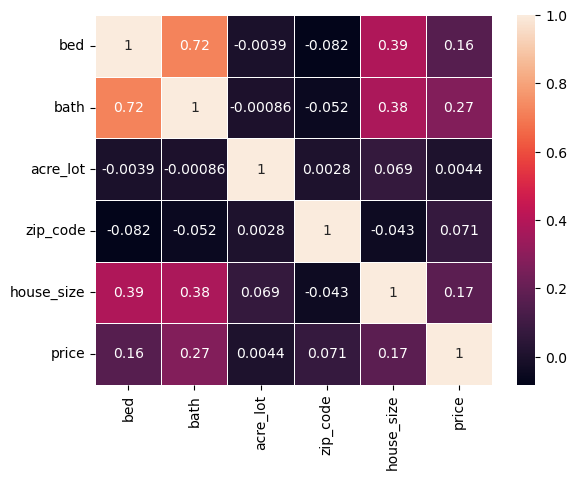

In [7]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)

In [8]:
state_count=df['state'].value_counts()
state_count

New Jersey        231958
New York          197215
Massachusetts     175248
Connecticut        89778
New Hampshire      51394
Vermont            46460
Maine              36650
Rhode Island       29596
Puerto Rico        24679
Pennsylvania       17148
Virgin Islands      2573
Delaware            2135
Georgia               50
Virginia              31
South Carolina        25
Tennessee             20
Wyoming                3
West Virginia          3
Name: state, dtype: int64

In [9]:
#Dropping the states that contain the data < 50
df=df.drop(df[df['state'].map(state_count) <= 50].index)
df['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Hampshire', 'Vermont', 'New Jersey', 'New York',
       'Rhode Island', 'Maine', 'Pennsylvania', 'Delaware'], dtype=object)

In [10]:
# Dropping Unwanted Columns.
data = df.drop(columns=['status','acre_lot', 'zip_code', 'prev_sold_date','city'])
data

,bed,bath,state,house_size,price
0,3.0,2.0,Puerto Rico,920.0,105000.0
1,4.0,2.0,Puerto Rico,1527.0,80000.0
2,2.0,1.0,Puerto Rico,748.0,67000.0
3,4.0,2.0,Puerto Rico,1800.0,145000.0
4,6.0,2.0,Puerto Rico,NaN,65000.0
...,...,...,...,...,...
904961,2.0,2.0,New York,NaN,359000.0
904962,2.0,2.0,New York,1200.0,299000.0
904963,NaN,1.0,New York,NaN,120000.0
904964,3.0,2.0,New York,NaN,449000.0


In [11]:
# Printing a detailed summary of our dataframe.
data.describe()

,bed,bath,house_size,price
count,775072.000000,791028.000000,6.120260e+05,9.047630e+05
mean,3.332085,2.484174,2.138341e+03,8.775233e+05
std,2.065342,1.931668,3.046713e+03,2.457865e+06
min,1.000000,1.000000,1.000000e+02,0.000000e+00
25%,2.000000,2.000000,1.132000e+03,2.688880e+05
50%,3.000000,2.000000,1.650000e+03,4.750000e+05
75%,4.000000,3.000000,2.495000e+03,8.300000e+05
max,123.000000,198.000000,1.450112e+06,8.750000e+08


In [12]:
# Finding Number of null Values in each column. 
data.isnull().sum()

bed           129762
bath          113806
state              0
house_size    292808
price             71
dtype: int64

In [13]:
#Dropping the rows which have atleast two null values
data = data[~(data.isna().sum(axis=1) >= 2)]
data.isnull().sum()

bed            12362
bath            4598
state              0
house_size    180650
price              0
dtype: int64

In [14]:
#Dropping the remaining rows that contain null values in column bed or bath
data = data.drop(data[data['bed'].isnull()].index, axis=0)
data = data.drop(data[data['bath'].isnull()].index, axis=0)

In [15]:
# Finding Number of null Values in each column. 
data.isnull().sum()

bed                0
bath               0
state              0
house_size    180650
price              0
dtype: int64

In [16]:
null_values_by_state = data[data['house_size'].isnull()].groupby('state').size().reset_index(name='null_count')

# Display null values by state
print(null_values_by_state)
max(null_values_by_state['null_count'])

             state  null_count
0      Connecticut          25
1         Delaware         105
2            Maine          40
3    Massachusetts         165
4       New Jersey      117471
5         New York       61814
6     Pennsylvania         231
7      Puerto Rico         367
8     Rhode Island          68
9          Vermont         123
10  Virgin Islands         241


117471

In [17]:
total_entries_by_state = data.groupby('state').size().reset_index(name='total_entries')

# Display total entries by state
print(total_entries_by_state)

             state  total_entries
0      Connecticut          78235
1         Delaware           1988
2            Maine          24564
3    Massachusetts         148332
4    New Hampshire          32171
5       New Jersey         216004
6         New York         175189
7     Pennsylvania          15044
8      Puerto Rico          21313
9     Rhode Island          28212
10         Vermont          28121
11  Virgin Islands            742


### So, now lets handle missing values in house_size using Predictive Imputation

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['state_numeric'] = label_encoder.fit_transform(data['state'])
data

,bed,bath,state,house_size,price,state_numeric
0,3.0,2.0,Puerto Rico,920.0,105000.0,8
1,4.0,2.0,Puerto Rico,1527.0,80000.0,8
2,2.0,1.0,Puerto Rico,748.0,67000.0,8
3,4.0,2.0,Puerto Rico,1800.0,145000.0,8
4,6.0,2.0,Puerto Rico,NaN,65000.0,8
...,...,...,...,...,...,...
904960,2.0,2.0,New York,1200.0,399000.0,6
904961,2.0,2.0,New York,NaN,359000.0,6
904962,2.0,2.0,New York,1200.0,299000.0,6
904964,3.0,2.0,New York,NaN,449000.0,6


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [20]:
# Separate data into two sets: one with null values and one without null values
data_with_null = data[data['house_size'].isnull()]
data_without_null = data.dropna(subset=['house_size'])

# Select features and target variable for training
X_train = data_without_null[['bed', 'bath', 'state_numeric', 'price']]  # Features
y_train = data_without_null['house_size']  # Target variable

# Train a regression model
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Select features for prediction
X_predict = data_with_null[['bed', 'bath', 'state_numeric', 'price']]

# Predict null values
predicted_house_size = regressor.predict(X_predict)

# Impute predicted values into the DataFrame
data.loc[data['house_size'].isnull(), 'house_size'] = predicted_house_size

In [21]:
data = data.drop(columns=['state_numeric'])

In [22]:
data.isnull().sum()

bed           0
bath          0
state         0
house_size    0
price         0
dtype: int64

## Removing outlier

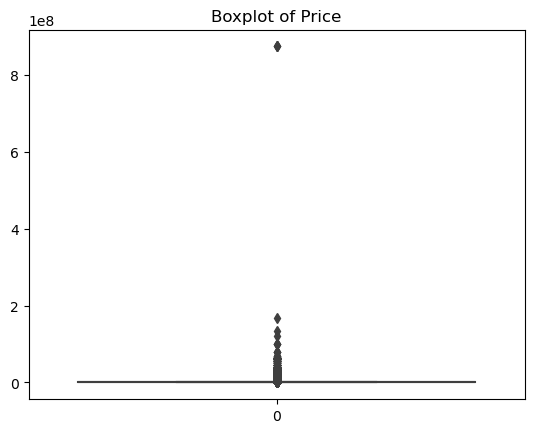

In [23]:
sns.boxplot(data=data['price'])
plt.title("Boxplot of Price")
plt.show()

In [24]:
# Calculate the 25th and 75th percentiles
q25, q75 = np.percentile(data["price"], [25, 75])

# Calculate the IQR
iqr = q75 - q25

# Define the limit for outliers (e.g., using 1.5 times the IQR)
upper_limit = q75 + 1.5 * iqr
lower_limit = q25 - 1.5 * iqr

# Calculate the percentage of data points that are outliers
percentage_outliers = len(df[df["price"] > upper_limit]) / len(df.index) * 100

# Remove rows with "price" values exceeding the limit
data = data[data["price"] < upper_limit]
data = data[data["price"] > lower_limit]

# Print the percentage of data points that are outliers
print("Percentage of outliers:", percentage_outliers)
upper_limit

Percentage of outliers: 9.223680807750371


1760150.0

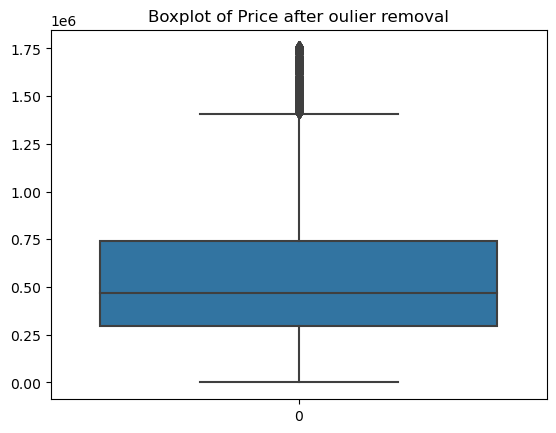

In [25]:
sns.boxplot(data=data['price'])
plt.title("Boxplot of Price after oulier removal")
plt.show()

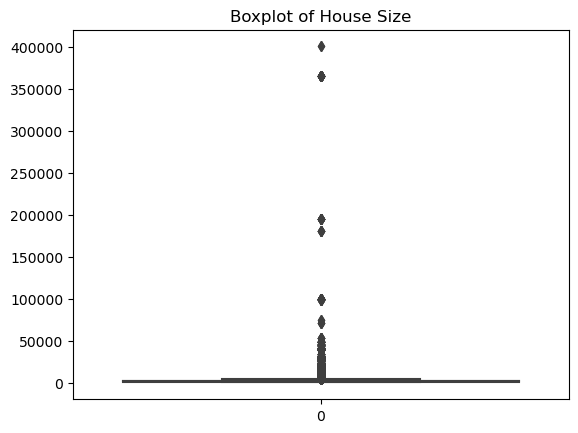

In [26]:
sns.boxplot(data=data['house_size'])
plt.title("Boxplot of House Size")
plt.show()

In [27]:
# Calculate the 25th and 75th percentiles
q25, q75 = np.percentile(data["house_size"], [25, 75])

# Calculate the IQR
iqr = q75 - q25

# Define the limit for outliers (e.g., using 1.5 times the IQR)
upper_limit = q75 + 1.5 * iqr
lower_limit = q25 - 1.5 * iqr

# Calculate the percentage of data points that are outliers
percentage_outliers = len(df[df["house_size"] > upper_limit]) / len(df.index) * 100

# Remove rows with "house_size" values exceeding the limit
data = data[data["house_size"] < upper_limit]
data = data[data["house_size"] > lower_limit]

# Print the percentage of data points that are outliers
print("Percentage of outliers:", percentage_outliers)
upper_limit

Percentage of outliers: 4.860449541020784


4185.0

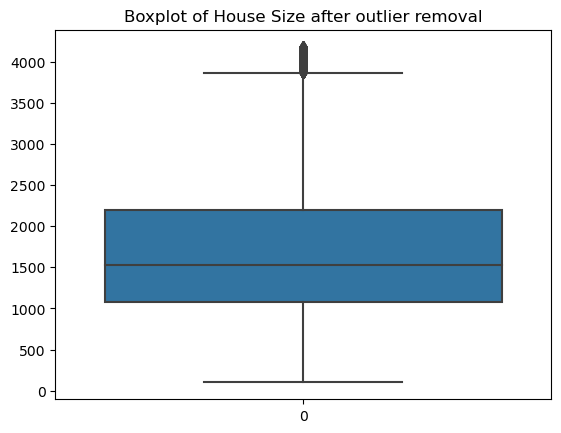

In [28]:
sns.boxplot(data=data['house_size'])
plt.title("Boxplot of House Size after outlier removal")
plt.show()

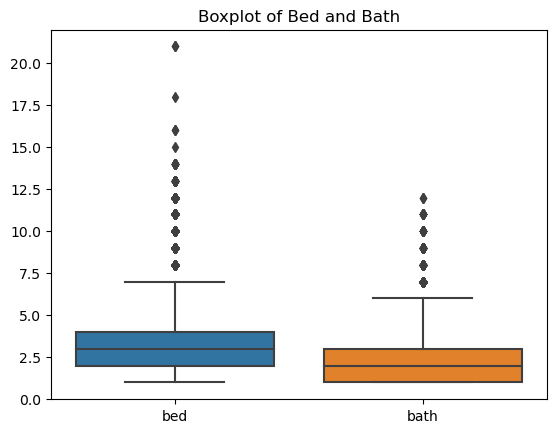

In [29]:
sns.boxplot(data=data[['bed','bath']])
plt.title("Boxplot of Bed and Bath")
plt.show()

In [30]:
# Calculate the 25th and 75th percentiles
q25, q75 = np.percentile(data["bed"], [25, 75])

# Calculate the IQR
iqr = q75 - q25

# Define the limit for outliers (e.g., using 1.5 times the IQR)
upper_limit = q75 + 1.5 * iqr
lower_limit = q25 - 1.5 * iqr

# Calculate the percentage of data points that are outliers
percentage_outliers = len(df[df["bed"] > upper_limit]) / len(df.index) * 100

# Remove rows with "bed" values exceeding the limit
data = data[data["bed"] < upper_limit]
data = data[data["bed"] > lower_limit]

# Print the percentage of data points that are outliers
print("Percentage of outliers:", percentage_outliers)
upper_limit

Percentage of outliers: 2.6652402540134434


7.0

In [31]:
# Calculate the 25th and 75th percentiles
q25, q75 = np.percentile(data["bath"], [25, 75])

# Calculate the IQR
iqr = q75 - q25

# Define the limit for outliers (e.g., using 1.5 times the IQR)
upper_limit = q75 + 1.5 * iqr
lower_limit = q25 - 1.5 * iqr

# Calculate the percentage of data points that are outliers
percentage_outliers = len(df[df["bath"] > upper_limit]) / len(df.index) * 100

# Remove rows with "bath" values exceeding the limit
data = data[data["bath"] < upper_limit]
data = data[data["bath"] > lower_limit]

# Print the percentage of data points that are outliers
print("Percentage of outliers:", percentage_outliers)
upper_limit

Percentage of outliers: 1.7466187168033034


6.0

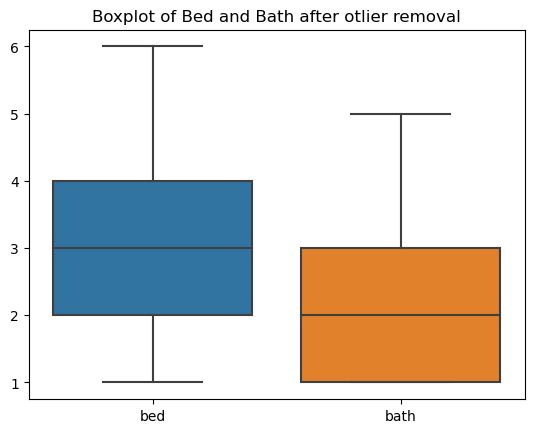

In [32]:
sns.boxplot(data=data[['bed','bath']])
plt.title("Boxplot of Bed and Bath after otlier removal")
plt.show()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641938 entries, 0 to 904965
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bed         641938 non-null  float64
 1   bath        641938 non-null  float64
 2   state       641938 non-null  object 
 3   house_size  641938 non-null  float64
 4   price       641938 non-null  float64
dtypes: float64(4), object(1)
memory usage: 29.4+ MB


In [34]:
data.describe()

,bed,bath,house_size,price
count,641938.000000,641938.000000,641938.000000,6.419380e+05
mean,2.928122,2.131201,1667.625689,5.390824e+05
std,1.212313,0.937095,783.793388,3.476597e+05
min,1.000000,1.000000,100.000000,0.000000e+00
25%,2.000000,1.000000,1066.000000,2.850000e+05
50%,3.000000,2.000000,1504.000000,4.500000e+05
75%,4.000000,3.000000,2133.000000,6.999000e+05
max,6.000000,5.000000,4184.957000,1.760000e+06


### Saving Cleaned dataset

data.to_csv('Cleaned_data.csv', index=False)

# Exploratory Data Analysis

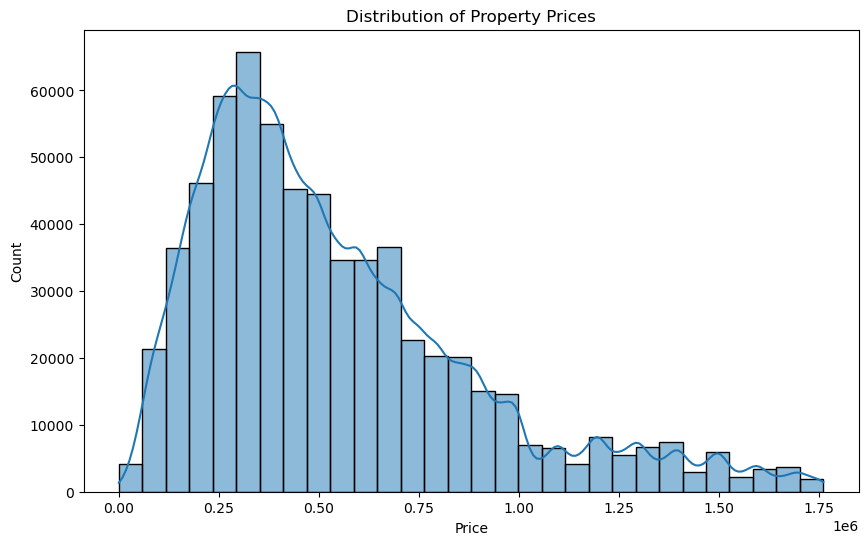

In [35]:
# Distribution of Price
plt.figure(figsize=(10,6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

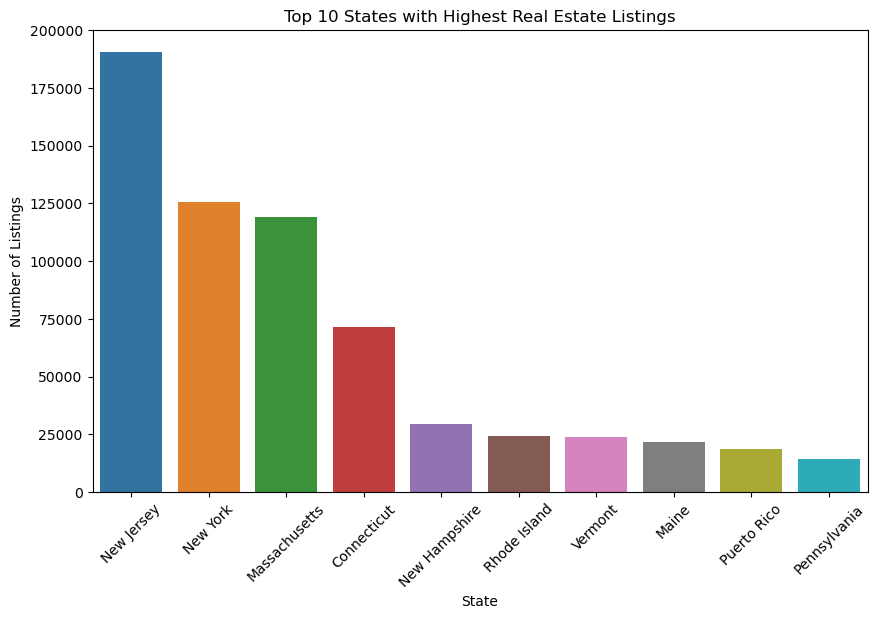

In [36]:
top_states = data['state'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 10 States with Highest Real Estate Listings')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

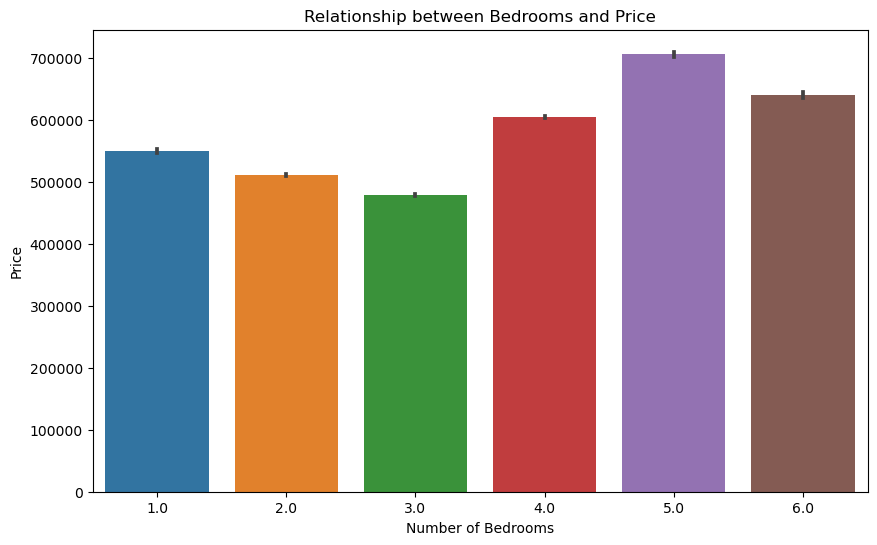

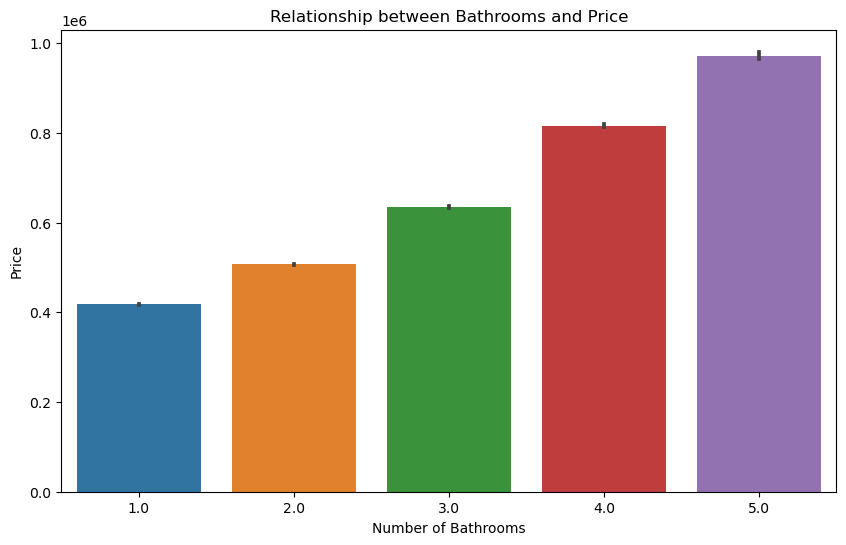

In [37]:
# Number of rooms and price 
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='bed', y='price')
plt.title('Relationship between Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Number of bedrooms and price
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='bath', y='price')
plt.title('Relationship between Bathrooms and Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='price', ylabel='state'>

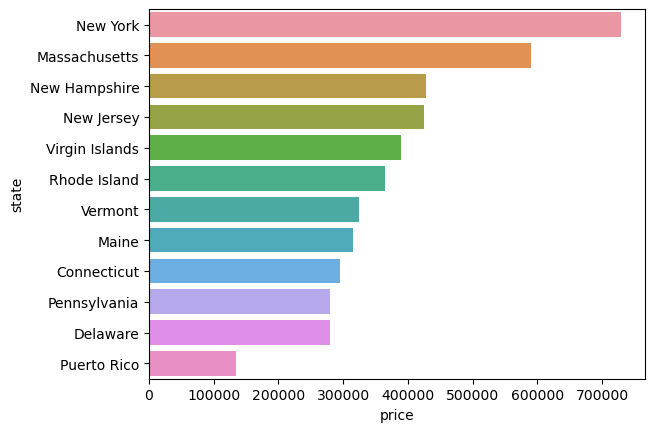

In [38]:
df1 = data.groupby('state', as_index=False)['price'].median().sort_values('price', ascending=False)
sns.barplot(data = df1, x = 'price', y = 'state')

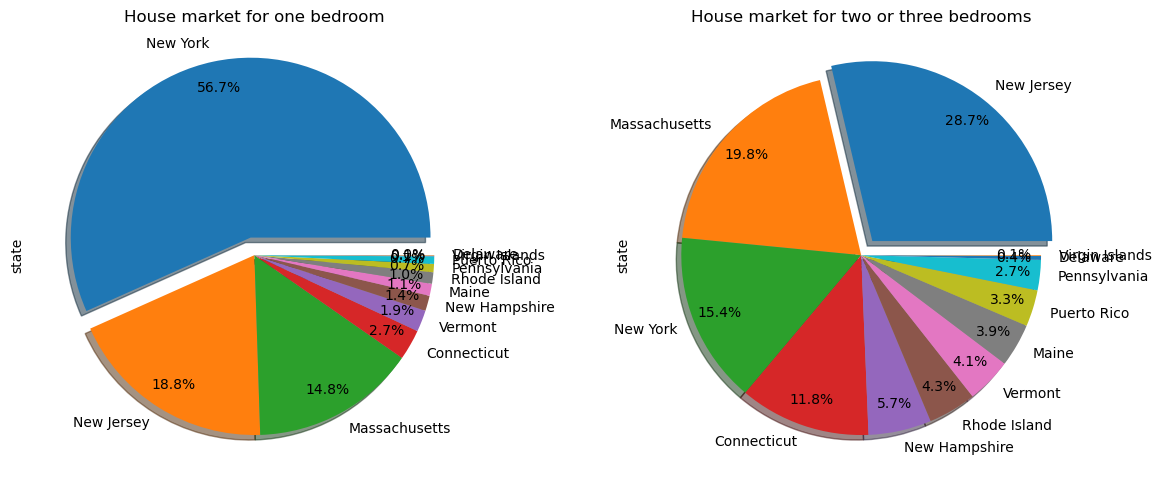

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for one-bedroom houses
data_1bed = data[data['bed'] == 1]['state'].value_counts()
explode_1bed = [0.1 if count == data_1bed.max() else 0 for count in data_1bed]
data_1bed.plot.pie(ax=ax[0,], title='House market for one bedroom', autopct='%1.1f%%', pctdistance=0.85, explode=explode_1bed, shadow=True)

# Plot for two or three-bedroom houses
data_2or3bed = data[data['bed'].isin([2, 3])]['state'].value_counts()
explode_2or3bed = [0.1 if count == data_2or3bed.max() else 0 for count in data_2or3bed]
data_2or3bed.plot.pie(ax=ax[1], title='House market for two or three bedrooms', autopct='%1.1f%%', pctdistance=0.85, explode=explode_2or3bed, shadow=True)

plt.tight_layout()
plt.show()


In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['state_numeric'] = label_encoder.fit_transform(data['state'])
data = data.drop("state", axis=1)
data

,bed,bath,house_size,price,state_numeric
0,3.0,2.0,920.000000,105000.0,8
1,4.0,2.0,1527.000000,80000.0,8
2,2.0,1.0,748.000000,67000.0,8
3,4.0,2.0,1800.000000,145000.0,8
4,6.0,2.0,1405.100000,65000.0,8
...,...,...,...,...,...
904960,2.0,2.0,1200.000000,399000.0,6
904961,2.0,2.0,1073.439654,359000.0,6
904962,2.0,2.0,1200.000000,299000.0,6
904964,3.0,2.0,1272.455794,449000.0,6


In [41]:
numeric_to_state = {label: state for label, state in enumerate(label_encoder.classes_)}
# Print the mapping
print(numeric_to_state)

{0: 'Connecticut', 1: 'Delaware', 2: 'Maine', 3: 'Massachusetts', 4: 'New Hampshire', 5: 'New Jersey', 6: 'New York', 7: 'Pennsylvania', 8: 'Puerto Rico', 9: 'Rhode Island', 10: 'Vermont', 11: 'Virgin Islands'}


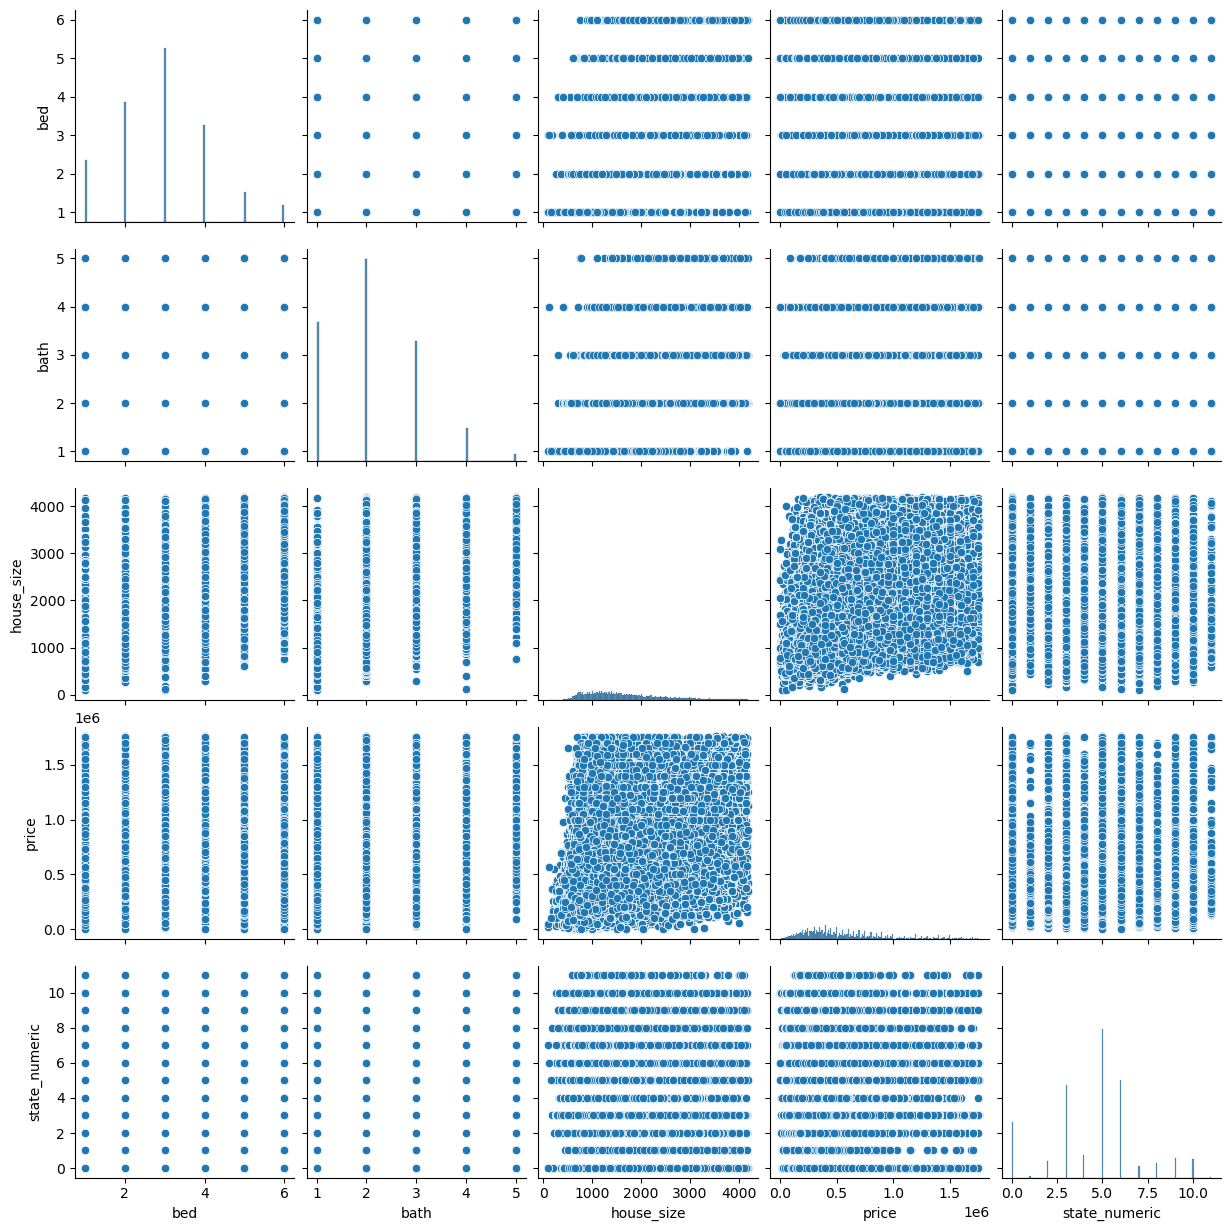

In [42]:
sns.pairplot(data)

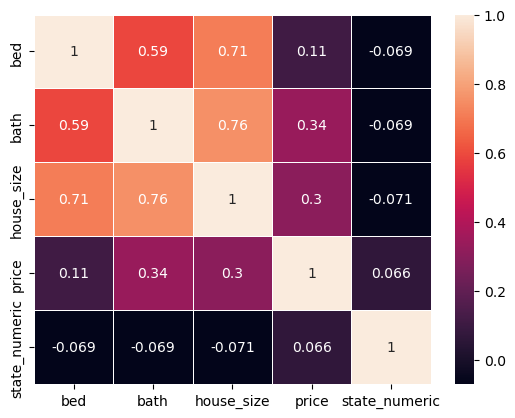

In [43]:
sns.heatmap(data.corr(), annot=True, linewidths=0.5);

In [44]:
data.describe()

,bed,bath,house_size,price,state_numeric
count,641938.000000,641938.000000,641938.000000,6.419380e+05,641938.000000
mean,2.928122,2.131201,1667.625689,5.390824e+05,4.583418
std,1.212313,0.937095,783.793388,3.476597e+05,2.424244
min,1.000000,1.000000,100.000000,0.000000e+00,0.000000
25%,2.000000,1.000000,1066.000000,2.850000e+05,3.000000
50%,3.000000,2.000000,1504.000000,4.500000e+05,5.000000
75%,4.000000,3.000000,2133.000000,6.999000e+05,6.000000
max,6.000000,5.000000,4184.957000,1.760000e+06,11.000000


# Model Training


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [46]:
from sklearn.preprocessing import StandardScaler

# Identify columns for standardization
cols_to_standardize = ['bed', 'bath', 'house_size']

# Exclude the target variable ('price') from standardization
if 'price' in cols_to_standardize:
    cols_to_standardize.remove('price')

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform the selected columns
data[cols_to_standardize] = scaler.fit_transform(data[cols_to_standardize])


In [47]:
dependent='price'
independent=data.columns.tolist()
independent.remove(dependent)
x=data[independent].values
y=data[dependent].values

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [49]:
random_forest=RandomForestRegressor(n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42)

In [50]:
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

from joblib import dump
dump(random_forest, 'model.joblib')